## End-to-end data science project steps

### Statistical Analysis

### Predictive Modeling

### Feature Engineering

In [174]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from scipy import stats

In [175]:
np.random.seed(42)
n = 1000
data = pd.DataFrame({
'user_id': np.arange(n),
'sessions': np.random.poisson(10, n),
'avg_session_time': np.random.normal(5, 2, n).clip(1, 15),
'purchases': np.random.poisson(2, n),
'spend': np.random.gamma(2, 50, n),
'is_churned': np.random.binomial(1, 0.3, n)
})

In [176]:
### EDA & Outlier Detection
print(data.describe())

           user_id     sessions  avg_session_time    purchases        spend  \
count  1000.000000  1000.000000       1000.000000  1000.000000  1000.000000   
mean    499.500000     9.904000          5.027470     1.972000   101.210306   
std     288.819436     3.227879          1.944235     1.338285    72.606796   
min       0.000000     1.000000          1.000000     0.000000     2.241157   
25%     249.750000     8.000000          3.704001     1.000000    48.884109   
50%     499.500000    10.000000          5.013863     2.000000    82.921066   
75%     749.250000    12.000000          6.332043     3.000000   136.987401   
max     999.000000    21.000000         12.852475     8.000000   581.749328   

        is_churned  
count  1000.000000  
mean      0.288000  
std       0.453058  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  


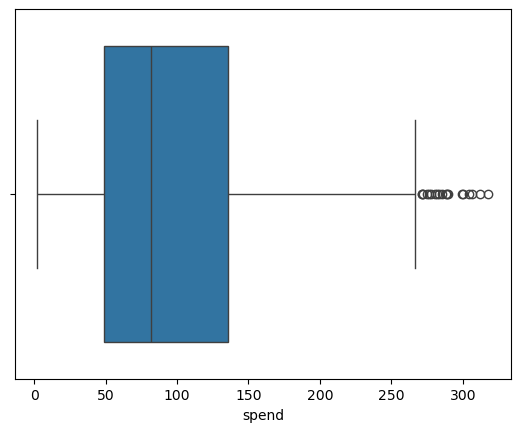

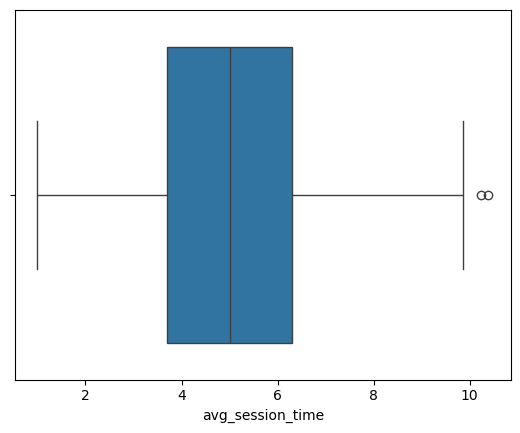

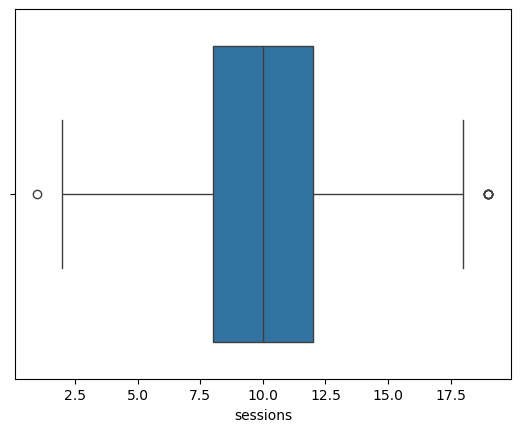

In [191]:
# aykırı değer boxplot üzerinden tespit ve görsel
sns.boxplot(x=data['spend'])
plt.show()

sns.boxplot(x=data['avg_session_time'])
plt.show()

sns.boxplot(x=data['sessions'])
plt.show()

In [192]:
# Z-score yöntemiyle outlier temizleme
data = data[(np.abs(stats.zscore(data[['sessions','avg_session_time','spend']])) < 3).all(axis=1)]

### Bir değerin ortalamadan kaç standart sapma uzaklıkta olduğunu hesaplar.

### Z-score 3’ten büyükse (yani değer ortalamadan 3 standart sapmadan fazla uzaksa) bu genelde outlier kabul edilir.


In [193]:
data

,user_id,sessions,avg_session_time,purchases,spend,is_churned,spend_per_session,purchase_ratio
0,0,12,6.430763,0,80.993704,1,6.749475,0.000000
1,1,6,6.436371,1,133.577599,0,22.262933,0.166667
2,2,11,5.876951,2,9.926975,0,0.902452,0.181818
3,3,14,5.039233,3,81.969497,0,5.854964,0.214286
4,4,7,6.345722,2,63.975250,0,9.139321,0.285714
...,...,...,...,...,...,...,...,...
995,995,6,4.283941,1,42.651542,0,7.108590,0.166667
996,996,10,4.721206,1,206.511210,0,20.651121,0.100000
997,997,10,6.479306,3,285.692057,0,28.569206,0.300000
998,998,18,1.181288,1,80.832049,0,4.490669,0.055556


In [194]:
# 4. Feature Engineering
pd.options.mode.copy_on_write = True

data['spend_per_session'] = data['spend'] / (data['sessions']) # sıfıra bölme hatasını engellemek için +1 yapmadım. session en düşük zaten 1 
data['purchase_ratio'] = data['purchases'] / (data['sessions'])

In [195]:
data

,user_id,sessions,avg_session_time,purchases,spend,is_churned,spend_per_session,purchase_ratio
0,0,12,6.430763,0,80.993704,1,6.749475,0.000000
1,1,6,6.436371,1,133.577599,0,22.262933,0.166667
2,2,11,5.876951,2,9.926975,0,0.902452,0.181818
3,3,14,5.039233,3,81.969497,0,5.854964,0.214286
4,4,7,6.345722,2,63.975250,0,9.139321,0.285714
...,...,...,...,...,...,...,...,...
995,995,6,4.283941,1,42.651542,0,7.108590,0.166667
996,996,10,4.721206,1,206.511210,0,20.651121,0.100000
997,997,10,6.479306,3,285.692057,0,28.569206,0.300000
998,998,18,1.181288,1,80.832049,0,4.490669,0.055556


In [196]:
# 5. Modelleme (Churn Prediction) = > Classification
X = data[['sessions','avg_session_time','spend','spend_per_session','purchase_ratio']] ### inputlarımız 
y = data['is_churned'] # outputs

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # %80 Train % 20 Test

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [198]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [199]:
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1.0))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82       137
           1       1.00      0.00      0.00        59

    accuracy                           0.70       196
   macro avg       0.85      0.50      0.41       196
weighted avg       0.79      0.70      0.58       196

ROC-AUC: 0.5


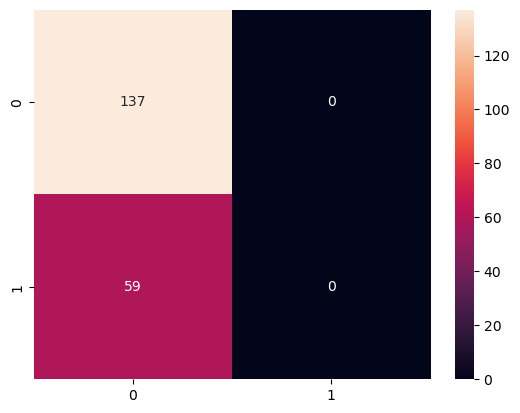

In [200]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')
plt.show()

In [201]:
# 6. A/B Test Simülasyonu (yarım)
# CTR farkını test etme Tıklama / Gösterim.

## (CPC, CPM, CPI, CPA, CAC)

### (ROAS, ROI, LTV, Payback Period)

### (DAU/MAU, Retention, Churn)


np.random.seed(42)
control = np.random.binomial(1, 0.12, 500)
treatment = np.random.binomial(1, 0.15, 500)


print("Control Mean CTR:", control.mean())
print("Treatment Mean CTR:", treatment.mean())


# T-test
t_stat, p_val = stats.ttest_ind(treatment, control)
print("T-stat:", t_stat, "P-value:", p_val)


Control Mean CTR: 0.138
Treatment Mean CTR: 0.14
T-stat: 0.09131836123684156 P-value: 0.9272579539840707


In [202]:
if p_val < 0.05:
    print("istatistiksel olarak anlamlıdır.")
else:
    print("istatistiksel olarak anlamlı değildir.")

istatistiksel olarak anlamlı değildir.
